In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("co2.csv")
df.dtypes

time     object
co2     float64
dtype: object

In [18]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

time    datetime64[ns]
co2            float64
dtype: object

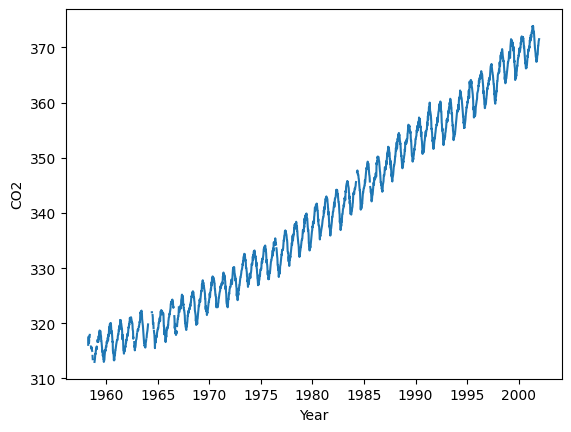

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['time'], df['co2'])
ax.set_xlabel("Year")
ax.set_ylabel("CO2")
plt.show()

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB
None


In [21]:
df['co2'] = df['co2'].interpolate() #Xử lí null roài thích thì in ra 

In [22]:
def create_ts_data(df, window_size = 5, target_size =3  ):
    for i in range(1,window_size):
        df[f'co2_{i}'] = df['co2'].shift(-i)
    for i in range(target_size):
        df[f'target_{i+1}'] = df['co2'].shift(-i-window_size)
    df = df.dropna(axis = 0)
    return df


In [23]:
df = create_ts_data(df)
print(df)

           time    co2  co2_1  co2_2  co2_3  co2_4  target_1  target_2  \
0    1958-03-29  316.1  317.3  317.6  317.5  316.4    316.90    317.20   
1    1958-04-05  317.3  317.6  317.5  316.4  316.9    317.20    317.50   
2    1958-04-12  317.6  317.5  316.4  316.9  317.2    317.50    317.90   
3    1958-04-19  317.5  316.4  316.9  317.2  317.5    317.90    317.55   
4    1958-04-26  316.4  316.9  317.2  317.5  317.9    317.55    317.20   
...         ...    ...    ...    ...    ...    ...       ...       ...   
2272 2001-10-13  367.6  368.1  368.7  368.7  368.8    369.70    370.30   
2273 2001-10-20  368.1  368.7  368.7  368.8  369.7    370.30    370.30   
2274 2001-10-27  368.7  368.7  368.8  369.7  370.3    370.30    370.80   
2275 2001-11-03  368.7  368.8  369.7  370.3  370.3    370.80    371.20   
2276 2001-11-10  368.8  369.7  370.3  370.3  370.8    371.20    371.30   

      target_3  
0       317.50  
1       317.90  
2       317.55  
3       317.20  
4       316.85  
...      

In [25]:
x = df.drop(['time', 'target_1', 'target_2', 'target_3'], axis = 1 )
y = df[['target_1', 'target_2', 'target_3']]

In [26]:
train_ratio = 0.8
num_samples = len(x)

x_train = x[:int(num_samples*train_ratio)]
y_train = y[:int(num_samples*train_ratio)]
x_test =x[int(num_samples*train_ratio):]
y_test = y[int(num_samples*train_ratio):]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
target_size = 3 
regs = [LinearRegression() for _ in range(target_size)]

In [28]:
for i, reg in enumerate(regs):
    reg.fit(x_train, y_train['target_{}'.format(i+1)])

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = []
mse = []
mae = []
for i, reg in enumerate(regs):
    y_predict = reg.predict(x_test)
    mae.append(mean_absolute_error(y_test['target_{}'.format(i+1)], y_predict))
    mse.append(mean_squared_error(y_test['target_{}'.format(i+1)], y_predict))
    r2.append(r2_score(y_test['target_{}'.format(i+1)], y_predict))

In [30]:
print("R2: {}".format(r2))
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))

R2: [0.9906941835498276, 0.9823771406805397, 0.9728273214391047]
MSE: [0.22101469765793966, 0.4191794797112131, 0.6476309152612809]
MAE: [0.36187414798363077, 0.5058913973664194, 0.6465162623791746]
